In [10]:
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

## 데이터 합본

In [20]:
df1=pd.read_csv('./data/kurly.csv',encoding='utf-8')
df1['idx']=df1.index.values
df1

,category,brand,item,allergy,img,vegan,idx
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...",https://img-cf.kurly.com/shop/data/goodsview/2...,0,0
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...",https://img-cf.kurly.com/shop/data/goodsview/2...,0,1
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",https://img-cf.kurly.com/shop/data/goodsview/2...,0,2
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...",https://img-cf.kurly.com/shop/data/goodsview/2...,0,3
4,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...",https://img-cf.kurly.com/shop/data/goodsview/2...,0,4
...,...,...,...,...,...,...,...
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아",https://img-cf.kurly.com/shop/data/goodsview/2...,0,3751
3752,간식/과자/떡,키토랩,스테비아초콜릿,"우유,호두,밀,메밀,대두",https://img-cf.kurly.com/shop/data/goodsview/2...,0,3752
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란",https://img-cf.kurly.com/shop/data/goodsview/2...,0,3753
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,https://img-cf.kurly.com/shop/data/goodsview/2...,0,3754


In [21]:
df2=pd.read_csv('./data/kurly_ingredient.csv',encoding='utf-8')
df2

,img,이미지성분
0,0.jpg,"['고등어', '아황산류', '메밀', '옥수수유 옥수수', '복숭아', '오징어'..."
1,1.jpg,"['조개류', '정제소금', '주정', '떡류', '조기', '소스 소스', '참치..."
2,10.jpg,"['돼지고기', '난백분', '산도 조절제', '탈지 대도', '돈 지방', '향미..."
3,100.jpg,"['고등어', '호두', '올리브유', '팡핵유', '탄산칼슴', '아황산류', '..."
4,1000.jpg,"['적포도', '전복']"
...,...,...
3751,995.jpg,"['옥수수', '글리세린지방산에스테르', '현미', '유화제', '건면', '감자 ..."
3752,996.jpg,"['정제소금', '과채가공품', '해바라기씨유']"
3753,997.jpg,[]
3754,998.jpg,['고춧가루']


In [22]:
def idx(number):
    return int(number.split('.')[0])

df2['idx']=df2['img'].apply(idx)
df2.drop('img',axis=1,inplace=True)
df2=df2.sort_values(by='idx').reset_index(drop=True)
df2

,이미지성분,idx
0,"['고등어', '아황산류', '메밀', '옥수수유 옥수수', '복숭아', '오징어'...",0
1,"['조개류', '정제소금', '주정', '떡류', '조기', '소스 소스', '참치...",1
2,['정제수'],2
3,"['천일염', '양조간장']",3
4,"['마늘', '조개류', '전복', '내 두유', '콩기름', '홍합 포함']",4
...,...,...
3751,"['무엇', '자일리톨', '박하유']",3751
3752,[],3752
3753,"['아몬드', '크런치 캐러멜', '준 초콜릿', '포도당 시련', '해이 즐', ...",3753
3754,"['설탕', '소금', '대두', '매실과 육', '다시매', '간장']",3754


In [24]:
df=pd.merge(df1,df2,on='idx')
df.drop(['idx','vegan','img'],axis=1,inplace=True)
df

,category,brand,item,allergy,이미지성분
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","['고등어', '아황산류', '메밀', '옥수수유 옥수수', '복숭아', '오징어'..."
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","['조개류', '정제소금', '주정', '떡류', '조기', '소스 소스', '참치..."
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",['정제수']
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","['천일염', '양조간장']"
4,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","['마늘', '조개류', '전복', '내 두유', '콩기름', '홍합 포함']"
...,...,...,...,...,...
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","['무엇', '자일리톨', '박하유']"
3752,간식/과자/떡,키토랩,스테비아초콜릿,"우유,호두,밀,메밀,대두",[]
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란","['아몬드', '크런치 캐러멜', '준 초콜릿', '포도당 시련', '해이 즐', ..."
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,"['설탕', '소금', '대두', '매실과 육', '다시매', '간장']"


In [25]:
df.to_csv('./data/Kurly.csv',encoding='utf-8-sig',index=False)

## 데이터 확인

In [26]:
df

,category,brand,item,allergy,이미지성분
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","['고등어', '아황산류', '메밀', '옥수수유 옥수수', '복숭아', '오징어'..."
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","['조개류', '정제소금', '주정', '떡류', '조기', '소스 소스', '참치..."
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",['정제수']
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","['천일염', '양조간장']"
4,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","['마늘', '조개류', '전복', '내 두유', '콩기름', '홍합 포함']"
...,...,...,...,...,...
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","['무엇', '자일리톨', '박하유']"
3752,간식/과자/떡,키토랩,스테비아초콜릿,"우유,호두,밀,메밀,대두",[]
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란","['아몬드', '크런치 캐러멜', '준 초콜릿', '포도당 시련', '해이 즐', ..."
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,"['설탕', '소금', '대두', '매실과 육', '다시매', '간장']"


In [27]:
def find_inglst_length(length):
    products=[]
    for i,data in enumerate(df['이미지성분']):
        data=data.split("'")
        tmp=[]
        for each in data:
            if len(each) != 1:
                if ',' not in each:
                    tmp.append(each)
        if len(tmp)==length:
            products.append(df['item'][i])
    return len(products)

check_length={}
for i in range(100):
    check_length[i]=find_inglst_length(i)

In [ ]:
check_length

{0: 1,
 1: 1223,
 2: 300,
 3: 192,
 4: 197,
 5: 133,
 6: 123,
 7: 107,
 8: 116,
 9: 104,
 10: 104,
 11: 85,
 12: 76,
 13: 61,
 14: 90,
 15: 68,
 16: 58,
 17: 65,
 18: 53,
 19: 49,
 20: 55,
 21: 50,
 22: 52,
 23: 42,
 24: 33,
 25: 38,
 26: 29,
 27: 23,
 28: 16,
 29: 20,
 30: 14,
 31: 21,
 32: 22,
 33: 15,
 34: 19,
 35: 8,
 36: 6,
 37: 7,
 38: 9,
 39: 3,
 40: 6,
 41: 9,
 42: 4,
 43: 7,
 44: 6,
 45: 3,
 46: 4,
 47: 2,
 48: 1,
 49: 3,
 50: 1,
 51: 0,
 52: 2,
 53: 0,
 54: 4,
 55: 3,
 56: 1,
 57: 1,
 58: 1,
 59: 2,
 60: 1,
 61: 1,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 2,
 67: 0,
 68: 0,
 69: 0,
 70: 1,
 71: 0,
 72: 0,
 73: 1,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 1,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 1,
 95: 0,
 96: 0,
 97: 1,
 98: 0,
 99: 0}

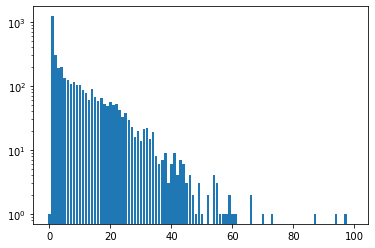

In [ ]:
import matplotlib.pyplot as plt

plt.bar(check_length.keys(),check_length.values())
plt.yscale('log')
plt.show()

In [ ]:
# 시각화 작업물 추가하기


## 분류작업

### 성분리스트 정리

In [28]:
kurly_ingredient=pd.read_csv('./data/컬리 성분 정리표_final.csv',encoding='cp949')
kurly_ingredient

,성분,분류
0,2호알루미늄레이크,식품첨가물
1,가공 버터,유제품
2,가공 소금,식품첨가물
3,가공 연유,유제품
4,가공 유지,기타
...,...,...
1258,NaN,NaN
1259,NaN,NaN
1260,NaN,NaN
1261,NaN,NaN


In [29]:
kurly_ingredient['분류'].unique()

array(['식품첨가물', '유제품', '기타', '육류', '해산물', '식물', '달걀', '꿀', nan],
      dtype=object)

In [30]:
kurly_milk=kurly_ingredient.loc[kurly_ingredient['분류']=='유제품','성분'].tolist()
kurly_sea=kurly_ingredient.loc[kurly_ingredient['분류']=='해산물','성분'].tolist()
kurly_meat=kurly_ingredient.loc[kurly_ingredient['분류']=='육류','성분'].tolist()
kurly_egg=kurly_ingredient.loc[kurly_ingredient['분류']=='달걀','성분'].tolist()
kurly_honey=kurly_ingredient.loc[kurly_ingredient['분류']=='꿀','성분'].tolist()

In [31]:
# 동물성 리스트
with open("./list/meat.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_meat.append(word)

meat_lst=[]
for word in kurly_meat:
    word=word.replace(' ','')
    meat_lst.append(word)

meat_lst=list(set(meat_lst))
len(meat_lst)

279

In [33]:
# 해산물 리스트
with open("./list/sea.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_sea.append(word)

sea_lst=[]
for word in kurly_sea:
    word=word.replace(' ','')
    sea_lst.append(word)

sea_lst=list(set(sea_lst))
len(sea_lst)

2166

In [34]:
# 유제품 리스트
with open("./list/milk.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_milk.append(word)

milk_lst=[]
for word in kurly_milk:
    word=word.replace(' ','')
    milk_lst.append(word)

milk_lst=list(set(milk_lst))
len(milk_lst)

115

In [35]:
# 알류 리스트
with open("./list/egg.txt", "r") as file:
    lst = file.readlines()

for word in lst:
    word=word.replace('\n','')
    if len(word)>0:
        kurly_egg.append(word)

egg_lst=[]
for word in kurly_egg:
    word=word.replace(' ','')
    egg_lst.append(word)

egg_lst=list(set(egg_lst))
len(egg_lst)

33

In [36]:
egg_lst

['알라닌',
 '난백분',
 '메추리알',
 '오리알',
 '계란노른자',
 '전란',
 '난황분',
 '유정란',
 '계란',
 '고명지단',
 '아미노산',
 '알단백',
 '난백액',
 '난황액',
 '전란액',
 '난각막',
 '피단',
 '알류',
 'Eggshellmembrane',
 '알부민',
 '품',
 '에그누들',
 '레시틴',
 '마요네즈',
 '알가열성형제',
 '난백',
 '염지란',
 '난황오일',
 '난황',
 '수란',
 '제란',
 '난류',
 '전란분']

In [37]:
# 꿀 리스트
honey_lst=[]
for word in kurly_honey:
    word=word.replace(' ','')
    honey_lst.append(word)

honey_lst=list(set(honey_lst))
len(honey_lst)

2

In [38]:
honey_lst.append('그래놀라')

### 비건 단계별 분류

In [39]:
df

,category,brand,item,allergy,이미지성분
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","['고등어', '아황산류', '메밀', '옥수수유 옥수수', '복숭아', '오징어'..."
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","['조개류', '정제소금', '주정', '떡류', '조기', '소스 소스', '참치..."
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",['정제수']
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","['천일염', '양조간장']"
4,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","['마늘', '조개류', '전복', '내 두유', '콩기름', '홍합 포함']"
...,...,...,...,...,...
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","['무엇', '자일리톨', '박하유']"
3752,간식/과자/떡,키토랩,스테비아초콜릿,"우유,호두,밀,메밀,대두",[]
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란","['아몬드', '크런치 캐러멜', '준 초콜릿', '포도당 시련', '해이 즐', ..."
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,"['설탕', '소금', '대두', '매실과 육', '다시매', '간장']"


In [40]:
def ingredient_to_list(text):
    text=text[1:-2]
    text=re.sub("'",'',text)
    text=text.replace(' ','')
    return text

df['ingredient']=df['이미지성분'].apply(ingredient_to_list)
df.drop(['이미지성분'],axis=1,inplace=True)
df

,category,brand,item,allergy,ingredient
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","고등어,아황산류,메밀,옥수수유옥수수,복숭아,오징어,홍합포함,설탕,조개류,전복,대두,..."
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","조개류,정제소금,주정,떡류,조기,소스소스,참치,비타민,가공소금,오징어,구연산,복합조..."
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",정제수
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장"
4,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","마늘,조개류,전복,내두유,콩기름,홍합포함"
...,...,...,...,...,...
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유"
3752,간식/과자/떡,키토랩,스테비아초콜릿,"우유,호두,밀,메밀,대두",
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란","아몬드,크런치캐러멜,준초콜릿,포도당시련,해이즐,화이트초콜릿,코코아애스,유지방문일유당..."
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,"설탕,소금,대두,매실과육,다시매,간장"


In [41]:
df=df[df['ingredient']!='']
df

,category,brand,item,allergy,ingredient
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","고등어,아황산류,메밀,옥수수유옥수수,복숭아,오징어,홍합포함,설탕,조개류,전복,대두,..."
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","조개류,정제소금,주정,떡류,조기,소스소스,참치,비타민,가공소금,오징어,구연산,복합조..."
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",정제수
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장"
4,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","마늘,조개류,전복,내두유,콩기름,홍합포함"
...,...,...,...,...,...
3750,간식/과자/떡,이브뚜리에,봉봉 초콜렛 12P,"우유,대두,밀","아몬드,천연향료,유청,전화당시럼,해이즐,전분,코코아파우더,글리셰린,프랄린,구연산,전..."
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유"
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란","아몬드,크런치캐러멜,준초콜릿,포도당시련,해이즐,화이트초콜릿,코코아애스,유지방문일유당..."
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,"설탕,소금,대두,매실과육,다시매,간장"


In [42]:
def classify_1(ingredient):
    # 일반식
    for word in ingredient.split(','):
        if word in meat_lst:
            return 'general'
    # 페스코
    for word in ingredient.split(','):
        if word in sea_lst:
            return 'pesco'

df['classify']=df['ingredient'].apply(classify_1)

In [43]:
df_classify=df[df['classify'].isnull()!=True]
df_need_classify=df[df['classify'].isnull()]

In [44]:
print(df_classify.shape)
print(df_need_classify.shape)
print(df.shape)

(1114, 6)
(1816, 6)
(2930, 6)


In [45]:
def yes_milk(ingredient):
    for word in ingredient.split(','):
        if word in milk_lst:
            return '1'
    return '0'

def yes_egg(ingredient):
    for word in ingredient.split(','):
        if word in egg_lst:
            return '1'
    return '0'

df_need_classify['milk']=df_need_classify['ingredient'].apply(yes_milk)
df_need_classify['egg']=df_need_classify['ingredient'].apply(yes_egg)
df_need_classify

,category,brand,item,allergy,ingredient,classify,milk,egg
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",정제수,None,0,0
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장",None,0,0
5,국/반찬/메인 요리,농협두부,내린천 원당 연두부 160g*6개입,대두,"두부응고제,두부",None,0,0
9,국/반찬/메인 요리,우오가시,민물 양념장어,"대두,밀","정제소금,설탕,주정,대두,포도당시럽,타피오카전분,조미료,간장,정제수",None,0,0
11,국/반찬/메인 요리,소중한식사,달래장,"대두,밀,복숭아,새우,게,토마토,오징어,고등어,아황산류,난류,가금류,우유,쇠고기,돼...",달래,None,0,0
...,...,...,...,...,...,...,...,...
3749,간식/과자/떡,쇼게튼,포 키즈 초콜릿,"대두,우유","천연향료,유화제,대두레시틴,바닐라향우유향,버터유지,코코아페이스트,초콜릿,코코아버터,...",None,1,0
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유",None,0,0
3753,간식/과자/떡,타르투프랑게,트뤼플랏 어소티드 스위트 초콜렛 70g (팩),"밀,우유,대두,보리,땅콩,계란","아몬드,크런치캐러멜,준초콜릿,포도당시련,해이즐,화이트초콜릿,코코아애스,유지방문일유당...",None,1,0
3754,간식/과자/떡,kurly,맛다시마 젤리 100g (냉장),없음,"설탕,소금,대두,매실과육,다시매,간장",None,0,0


In [46]:
# 락토오보
df_need_classify.loc[(df_need_classify['milk']=='1')&(df_need_classify['egg']=='1'),'classify']='lacto_ovo'

# 락토
df_need_classify.loc[(df_need_classify['milk']=='1')&(df_need_classify['egg']=='0'),'classify']='lacto'

# 오보
df_need_classify.loc[(df_need_classify['milk']=='0')&(df_need_classify['egg']=='1'),'classify']='ovo'

In [47]:
sub=df_need_classify[df_need_classify['classify'].isnull()!=True][['category','brand','item','allergy','ingredient','classify']]
print(df_classify.shape,sub.shape)

df_classify=pd.concat([df_classify,sub])
print(df_classify.shape)

(1114, 6) (630, 6)
(1744, 6)


In [48]:
df_need_classify=df_need_classify[df_need_classify['classify'].isnull()]
df_need_classify.drop(['milk','egg'],axis=1,inplace=True)
df_need_classify

,category,brand,item,allergy,ingredient,classify
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",정제수,None
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장",None
5,국/반찬/메인 요리,농협두부,내린천 원당 연두부 160g*6개입,대두,"두부응고제,두부",None
9,국/반찬/메인 요리,우오가시,민물 양념장어,"대두,밀","정제소금,설탕,주정,대두,포도당시럽,타피오카전분,조미료,간장,정제수",None
11,국/반찬/메인 요리,소중한식사,달래장,"대두,밀,복숭아,새우,게,토마토,오징어,고등어,아황산류,난류,가금류,우유,쇠고기,돼...",달래,None
...,...,...,...,...,...,...
3739,간식/과자/떡,라라스윗,발렌타인 기프트 세트,"우유,밀,계란,대두,땅콩,호두,메밀,복숭아,토마토,돼지고기","알룰로스,당류",None
3743,간식/과자/떡,발스낵,그랜드 감자칩 2묶음 6종 (택1),"씨솔트,와사비,칠리앤드라임,사우어크림앤드어니언,밀,우유,샐러리,겨자,사워크림앤허브,...","글루,정제소금,오일,고추냉이,정제수정제소금,감자플레이크,리브뉴클레오티드이나트롬,감자...",None
3745,간식/과자/떡,리터 스포트,미니 초콜릿믹스 9P,없음,"준초콜릿,옥수수",None
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유",None


In [49]:
def classify_3(ingredient):
    # 벌꿀
    for word in ingredient.split(','):
        if word in honey_lst:
            return 'honey'

df_need_classify['classify']=df_need_classify['ingredient'].apply(classify_3)
df_need_classify.head()

,category,brand,item,allergy,ingredient,classify
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",정제수,None
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장",None
5,국/반찬/메인 요리,농협두부,내린천 원당 연두부 160g*6개입,대두,"두부응고제,두부",None
9,국/반찬/메인 요리,우오가시,민물 양념장어,"대두,밀","정제소금,설탕,주정,대두,포도당시럽,타피오카전분,조미료,간장,정제수",None
11,국/반찬/메인 요리,소중한식사,달래장,"대두,밀,복숭아,새우,게,토마토,오징어,고등어,아황산류,난류,가금류,우유,쇠고기,돼...",달래,None


In [50]:
sub=df_need_classify[df_need_classify['classify']=='honey']
df_need_classify=df_need_classify[df_need_classify['classify'].isnull()]

df_classify=pd.concat([df_classify,sub])

In [51]:
print('분류 완료:',df_classify.shape)
print('분류 필요:',df_need_classify.shape)

분류 완료: (1756, 6)
분류 필요: (1174, 6)


In [52]:
df_need_classify['ingredient'].tolist()

['정제수',
 '천일염,양조간장',
 '두부응고제,두부',
 '정제소금,설탕,주정,대두,포도당시럽,타피오카전분,조미료,간장,정제수',
 '달래',
 '브이',
 '마늘,두유,대두유,인파,건고추,녹두',
 '탕류,칼슨',
 '구연산삼나트륨,두부,정제염',
 '대두유,글리세린지방산에스테르,게엑기스,작색료,혼합제제',
 '염화칼슴,식물성유지,탄산칼슴,대두,때도,파라과이,혼합제제,당류,황산칼슴',
 '정제소금,미향',
 '향미증진제,가공소금,조림류,대파,느타리버섯,시금치,콩나물',
 '백설탕,탕류,대두유,아몬드,논현동,고구마,올리고당,계피,팡이,유탕고구마',
 '고초가루,정주영,옥수수',
 '변성전분',
 '토마토주스,구연산,과채가공품,토마토',
 '마늘,능이',
 '이호준',
 '천일염,올리브유,두부,식물성유지',
 '식물성유지,조저해수염화마그네슴',
 '토마토',
 '기타가공품',
 '조류',
 '청주,미향,대추,당근,흑설탕,후추,포도당,볶은참깨,감초,정제수',
 '콜산',
 '우엉,정제소금',
 '당류',
 '올리브유,바절일,발효식초,산회방지찌,적양파,절임식품,압착올리브유,토마토,카라멸쑥소,방울토마토',
 '마늘,전분가공품,당면,고구마전분,소맥,양파,양조간장,당근,천일염,목이버섯,액상과당,노란파프리카,정제수',
 '혼합제제',
 '설탕,생강,잡쌀풀,사과',
 '애호박,가공소금,콩나물',
 '호두,생강',
 '백설탕,당류,재지에소금,감자',
 '비름',
 '마늘,두유,원당,대두,당류가공품',
 '정제솜,감재',
 '대두',
 '들기름,식염',
 '양배추',
 '호두,기타과당,우엉,아황산류,정제수',
 '비타민,복숭아,정제수',
 '대두,쥐눈이콩',
 '정제소금',
 '정제소금,대두,유기한,고춧가루',
 '간장미림,조회,근두부,표프로,기타가공품,파프리카,오이,일본두부',
 '다진',
 '정제소금,네덜란드,옥수수전분,유기농토마토주스,두류가공품,유기농강낭콩,유기농',
 '설탕,멸치액첫,미증전제,천일염,물엿,절임오이,오이,리보뉴클레오티드이나트륨,양파',
 '백설탕,산도

### 분류 안된 상품 -> 상품이름으로도 구분

In [53]:
df_need_classify

,category,brand,item,allergy,ingredient,classify
2,국/반찬/메인 요리,My little recipe,안동에서 올라온 전통찜닭 대용량 (3~4인용),"닭고기,오징어,밀,대두,닭고기,오징어,우유,대두,밀",정제수,None
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장",None
5,국/반찬/메인 요리,농협두부,내린천 원당 연두부 160g*6개입,대두,"두부응고제,두부",None
9,국/반찬/메인 요리,우오가시,민물 양념장어,"대두,밀","정제소금,설탕,주정,대두,포도당시럽,타피오카전분,조미료,간장,정제수",None
11,국/반찬/메인 요리,소중한식사,달래장,"대두,밀,복숭아,새우,게,토마토,오징어,고등어,아황산류,난류,가금류,우유,쇠고기,돼...",달래,None
...,...,...,...,...,...,...
3739,간식/과자/떡,라라스윗,발렌타인 기프트 세트,"우유,밀,계란,대두,땅콩,호두,메밀,복숭아,토마토,돼지고기","알룰로스,당류",None
3743,간식/과자/떡,발스낵,그랜드 감자칩 2묶음 6종 (택1),"씨솔트,와사비,칠리앤드라임,사우어크림앤드어니언,밀,우유,샐러리,겨자,사워크림앤허브,...","글루,정제소금,오일,고추냉이,정제수정제소금,감자플레이크,리브뉴클레오티드이나트롬,감자...",None
3745,간식/과자/떡,리터 스포트,미니 초콜릿믹스 9P,없음,"준초콜릿,옥수수",None
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유",None


In [54]:
def name_class(item):
    for word in item.split(' '):
        if word in meat_lst:
            return 'general'
    for word in item.split(' '):
        if word in sea_lst:
            return 'pesco'

df_need_classify['classify']=df_need_classify['item'].apply(name_class)

sub=df_need_classify[df_need_classify['classify'].isnull()!=True]
df_classify=pd.concat([df_classify,sub])
df_need_classify=df_need_classify[df_need_classify['classify'].isnull()]

In [55]:
def yes_milk(item):
    for word in item.split(' '):
        if word in milk_lst:
            return '1'
    return '0'

def yes_egg(item):
    for word in item.split(' '):
        if word in egg_lst:
            return '1'
    return '0'

df_need_classify['milk']=df_need_classify['item'].apply(yes_milk)
df_need_classify['egg']=df_need_classify['item'].apply(yes_egg)
df_need_classify

,category,brand,item,allergy,ingredient,classify,milk,egg
3,국/반찬/메인 요리,누테이블,메추리알 장조림 350g,"알류,메추리알,대두,밀,조개류,굴,알류,계란,우유,메밀,땅콩,고등어,게,새우,돼지고...","천일염,양조간장",None,0,1
5,국/반찬/메인 요리,농협두부,내린천 원당 연두부 160g*6개입,대두,"두부응고제,두부",None,0,0
11,국/반찬/메인 요리,소중한식사,달래장,"대두,밀,복숭아,새우,게,토마토,오징어,고등어,아황산류,난류,가금류,우유,쇠고기,돼...",달래,None,0,0
22,국/반찬/메인 요리,김구원선생,서리태 두부 2개,대두,브이,None,0,0
44,국/반찬/메인 요리,풀무원,백색 김밥 단무지,없음,"탕류,칼슨",None,0,0
...,...,...,...,...,...,...,...,...
3739,간식/과자/떡,라라스윗,발렌타인 기프트 세트,"우유,밀,계란,대두,땅콩,호두,메밀,복숭아,토마토,돼지고기","알룰로스,당류",None,0,0
3743,간식/과자/떡,발스낵,그랜드 감자칩 2묶음 6종 (택1),"씨솔트,와사비,칠리앤드라임,사우어크림앤드어니언,밀,우유,샐러리,겨자,사워크림앤허브,...","글루,정제소금,오일,고추냉이,정제수정제소금,감자플레이크,리브뉴클레오티드이나트롬,감자...",None,0,0
3745,간식/과자/떡,리터 스포트,미니 초콜릿믹스 9P,없음,"준초콜릿,옥수수",None,0,0
3751,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유",None,0,0


In [56]:
# 락토오보
df_need_classify.loc[(df_need_classify['milk']=='1')&(df_need_classify['egg']=='1'),'classify']='=lacto_ovo'

# 락토
df_need_classify.loc[(df_need_classify['milk']=='1')&(df_need_classify['egg']=='0'),'classify']='lacto'

# 오보
df_need_classify.loc[(df_need_classify['milk']=='0')&(df_need_classify['egg']=='1'),'classify']='ovo'

In [57]:
df_need_classify=df_need_classify.drop(['milk','egg'],axis=1)

sub=df_need_classify[df_need_classify['classify'].isnull()!=True]
df_classify=pd.concat([df_classify,sub])
df_need_classify=df_need_classify[df_need_classify['classify'].isnull()]

In [58]:
df_need_classify['classify']='vegan'
df_final=pd.concat([df_classify,df_need_classify])
df_final.reset_index(drop=True,inplace=True)
df_final

,category,brand,item,allergy,ingredient,classify
0,국/반찬/메인 요리,풀무원,국산콩 나또 3종,"국산콩생나또,대두,밀,쇠고기,검은콩생나또,대두,밀,쇠고기,국산콩와사비나또,대두,밀,...","고등어,아황산류,메밀,옥수수유옥수수,복숭아,오징어,홍합포함,설탕,조개류,전복,대두,...",general
1,국/반찬/메인 요리,kurly,전통 시장 물떡 (2팩),"밀,대두,우유,계란,우유,메밀,땅콩,고등어,게,새우,돼지고기,복숭아,토마토,아황산류...","조개류,정제소금,주정,떡류,조기,소스소스,참치,비타민,가공소금,오징어,구연산,복합조...",pesco
2,국/반찬/메인 요리,모두의맛집,소문난 원조 조방낙지 낙곱새,"대두,밀,새우,쇠고기,조개류,굴,난류,우유,메밀,땅콩,고등어,게,돼지고기,복숭아,토...","마늘,조개류,전복,내두유,콩기름,홍합포함",pesco
3,국/반찬/메인 요리,치즈룸x테이스팅룸,전복 솥밥 리조또,"전복미역밥,우유,조개류,전복,전복내장크림소스,대두,밀,우유,계란,닭고기,조개류,굴,...","마늘,고등어,호두,유청,소고기,껏일,포도당,구연산,가공이크림,토코페롤,변성전분,주정...",general
4,국/반찬/메인 요리,피코크,금돼지식당 통삽겹김치찌개,"대두,밀,돼지고기,쇠고기,알류,우유,메밀,땅콩,고등어,게,새우,복숭아,토마토,아황산...","마늘,고등어,향미증진제,콜산,호두,복숭아,홍합포함,인산이전분,닭고기,고춧가루,진한양...",general
...,...,...,...,...,...,...
2925,간식/과자/떡,라라스윗,발렌타인 기프트 세트,"우유,밀,계란,대두,땅콩,호두,메밀,복숭아,토마토,돼지고기","알룰로스,당류",vegan
2926,간식/과자/떡,발스낵,그랜드 감자칩 2묶음 6종 (택1),"씨솔트,와사비,칠리앤드라임,사우어크림앤드어니언,밀,우유,샐러리,겨자,사워크림앤허브,...","글루,정제소금,오일,고추냉이,정제수정제소금,감자플레이크,리브뉴클레오티드이나트롬,감자...",vegan
2927,간식/과자/떡,리터 스포트,미니 초콜릿믹스 9P,없음,"준초콜릿,옥수수",vegan
2928,간식/과자/떡,청우,아홉 번 구워만든 죽염캔디 38g,"땅콩,대두,우유,복숭아","무엇,자일리톨,박하유",vegan


In [59]:
df_final.to_csv('./data/kurly_classify.csv',encoding='utf-8-sig',index=False)